In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score


In [2]:
data = pd.read_csv(r'loan_prediction.csv')

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


C:\Users\nikhi\AppData\Local\Temp\ipykernel_16864\1921954884.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'], color='r')
C:\Users\nikhi\AppData\Local\Temp\ipykernel_16864\1921954884.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Credit_History'])


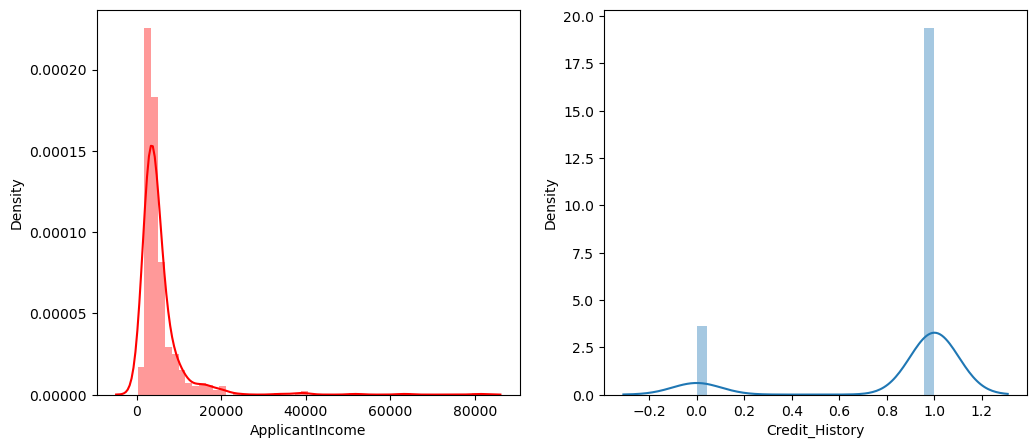

In [4]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'], color='r')
plt.subplot(122)
sns.distplot(data['Credit_History'])
plt.show()

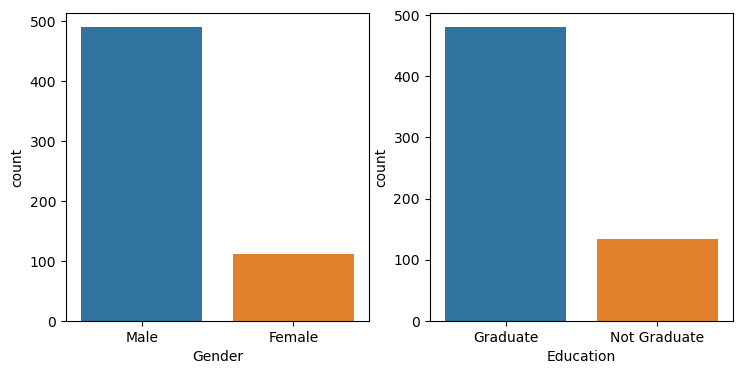

In [5]:
plt.figure(figsize=(18, 4))
plt.subplot(1,4,1)
sns.countplot(data=data, x='Gender')
plt.subplot(1,4,2)
sns.countplot(data=data, x='Education')
plt.show()


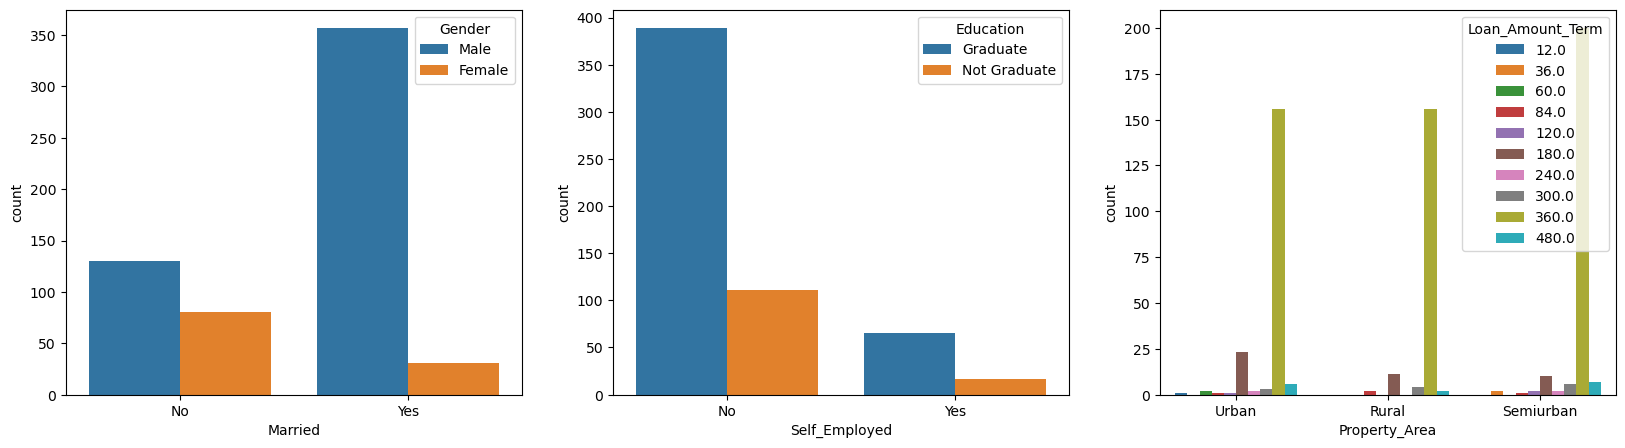

In [6]:
plt.figure(figsize=(20, 5))

plt.subplot(131)
sns.countplot(data=data, x='Married', hue='Gender')

plt.subplot(132)
sns.countplot(data=data, x='Self_Employed', hue='Education')

plt.subplot(133)
sns.countplot(data=data, x='Property_Area', hue='Loan_Amount_Term')

plt.show()

C:\Users\nikhi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 45.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nikhi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 70.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nikhi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 41.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


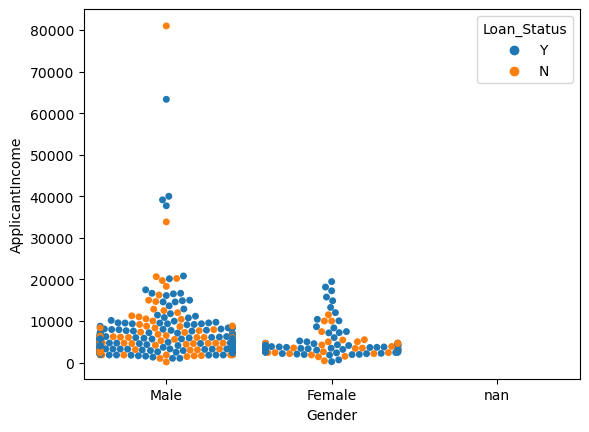

In [7]:
sns.swarmplot(data=data,  x='Gender', y='ApplicantIncome', hue='Loan_Status')
plt.show()

In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])


In [12]:
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])

In [13]:
data['Dependents'] = data['Dependents'].str.replace('+', '')

C:\Users\nikhi\AppData\Local\Temp\ipykernel_16864\1357097092.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Dependents'] = data['Dependents'].str.replace('+', '')


In [14]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])

In [15]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [16]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mode()[0])

In [17]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])

In [18]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [19]:
data['Gender'] = data['Gender'].map({'Female':1, 'Male':0})

In [20]:
data['Property_Area'] = data['Property_Area'].map({'Urban':2, 'Semiurban':1, 'Rural':0})

In [21]:
data['Married'] = data['Married'].map({'Yes':1, 'No':0})

In [22]:
data['Education'] = data['Education'].map({'Graduate':1, 'Not Graduate':0})

In [23]:
data['Loan_Status'] = data['Loan_Status'].map({'Y':1, 'N':0})

In [24]:
data['Gender']=data['Gender'].astype('int64')
data['Married']=data['Married'].astype('int64')
data['Dependents']=data['Dependents'].astype('int64')
data['Self_Employed'] = data['Self_Employed'].apply(lambda x: 0 if not x.isdigit() else int(x))

data['Coapplicant Income']=data['CoapplicantIncome'].astype('int64')
data['LoanAmount']=data['LoanAmount'].astype('int64')
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int64')
data['Credit_History']=data['Credit_History'].astype('int64')

In [25]:
from imblearn.combine import SMOTETomek
from collections import Counter
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Gender              614 non-null    int64  
 2   Married             614 non-null    int64  
 3   Dependents          614 non-null    int64  
 4   Education           614 non-null    int64  
 5   Self_Employed       614 non-null    int64  
 6   ApplicantIncome     614 non-null    int64  
 7   CoapplicantIncome   614 non-null    float64
 8   LoanAmount          614 non-null    int64  
 9   Loan_Amount_Term    614 non-null    int64  
 10  Credit_History      614 non-null    int64  
 11  Property_Area       614 non-null    int64  
 12  Loan_Status         614 non-null    int64  
 13  Coapplicant Income  614 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 67.3+ KB


In [27]:
data.drop('Loan_ID', axis=1, inplace=True)

In [28]:
smote_tomek = SMOTETomek(sampling_strategy=0.90)





In [29]:
y=data['Loan_Status']
x = data.drop(columns=['Loan_Status'], axis=1)

In [30]:
x.shape

(614, 12)

In [31]:
column_names = x.columns
column_names = column_names.tolist()

In [32]:
#from imblearn.over_sampling import SMOTE
#smote = SMOTE(random_state=42)
#x = 42
x_bal, y_bal = smote_tomek.fit_resample(x, y)


In [33]:
print(y.value_counts())
print(y_bal.value_counts())


1    422
0    192
Name: Loan_Status, dtype: int64
1    352
0    309
Name: Loan_Status, dtype: int64


In [34]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split

In [35]:
sc=StandardScaler()
x_bal=sc.fit_transform(x_bal)

In [36]:
x_bal = pd.DataFrame(x_bal, columns= column_names)

In [37]:
X_train, X_test, y_train, y_test,  = train_test_split(x_bal, y_bal, test_size=0.33, random_state=42)

In [38]:
from sklearn.tree import DecisionTreeClassifier


def decisionTree(x_train, x_test, y_train, y_test):
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    yPred = dt.predict(x_test)  # You had a space in 'x_test'

    print('*** DecisionTreeClassifier ***')
    print('Confusion matrix')
    print(confusion_matrix(y_test, yPred))
    print('Classification report')
    print(classification_report(y_test, yPred))


In [39]:
from sklearn.ensemble import RandomForestClassifier


def randomForest(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    yPred = rf.predict(x_test)

    print('*** RandomForestClassifier ***')
    print('Confusion matrix')
    print(confusion_matrix(y_test, yPred))
    print('Classification report')
    print(classification_report(y_test, yPred))


In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

def KNN(x_train, x_test, y_train, y_test):
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    yPred = knn.predict(x_test) 
    print('***KNeighborsClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test, yPred))
    print('Classification report')
    print(classification_report(y_test, yPred))


In [41]:
from xgboost import XGBClassifier


def xgboost(x_train, x_test, y_train, y_test):
    xg = XGBClassifier()
    xg.fit(x_train, y_train)
    yPred = xg.predict(x_test)
    print('***XGBoost Classifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test, yPred))
    print('Classification report')
    print(classification_report(y_test, yPred))


In [42]:

randomForest(X_train, X_test, y_train, y_test)

*** RandomForestClassifier ***
Confusion matrix
[[ 60  39]
 [  8 112]]
Classification report
              precision    recall  f1-score   support

           0       0.88      0.61      0.72        99
           1       0.74      0.93      0.83       120

    accuracy                           0.79       219
   macro avg       0.81      0.77      0.77       219
weighted avg       0.81      0.79      0.78       219



In [43]:
decisionTree(X_train, X_test, y_train, y_test)

*** DecisionTreeClassifier ***
Confusion matrix
[[65 34]
 [21 99]]
Classification report
              precision    recall  f1-score   support

           0       0.76      0.66      0.70        99
           1       0.74      0.82      0.78       120

    accuracy                           0.75       219
   macro avg       0.75      0.74      0.74       219
weighted avg       0.75      0.75      0.75       219



In [44]:
KNN(X_train, X_test, y_train, y_test)

***KNeighborsClassifier***
Confusion matrix
[[ 58  41]
 [ 10 110]]
Classification report
              precision    recall  f1-score   support

           0       0.85      0.59      0.69        99
           1       0.73      0.92      0.81       120

    accuracy                           0.77       219
   macro avg       0.79      0.75      0.75       219
weighted avg       0.78      0.77      0.76       219



In [45]:
xgboost(X_train, X_test, y_train, y_test)

***XGBoost Classifier***
Confusion matrix
[[ 61  38]
 [  9 111]]
Classification report
              precision    recall  f1-score   support

           0       0.87      0.62      0.72        99
           1       0.74      0.93      0.83       120

    accuracy                           0.79       219
   macro avg       0.81      0.77      0.77       219
weighted avg       0.80      0.79      0.78       219



In [46]:
from sklearn.model_selection import cross_val_score


In [47]:
# Random forest model is selected 
rf = RandomForestClassifier()
rf.fit(X_train,y_train) 
yPred = rf.predict(X_test)

In [48]:
f1_score(yPred,y_test, average='weighted')

0.7930323450556301

In [49]:
cv = cross_val_score(rf,x,y,cv=5)

In [50]:
np.mean(cv)

0.7915367186458749

In [51]:
import pickle
from sklearn.linear_model import LinearRegression

# Create a sample model (you should replace this with your actual model creation)
model = LinearRegression()

# Pickle the model
with open('rdf.pkl', 'wb') as file:
    pickle.dump(model, file)


In [52]:
pickle.dump(model, open(r'scale1.pkl', 'wb'))

In [53]:
from flask import Flask, render_template, request, redirect, url_for

In [54]:
import pandas as pd


In [55]:
import pickle
from flask import Flask

app = Flask(__name__)

# Specify the correct file paths
model = pickle.load(open(r'rdf.pkl', 'rb'))
scale = pickle.load(open(r'scale1.pkl', 'rb'))

In [56]:
@app.route('/')
def home():
    return render_templates('home.html')

In [57]:
@app.route( '/submit ',methods=[ "POST", "GET"])# route to show the predictions in la web UI
def submit():
    # reading the inputs given by the user
    input_feature=[int(x) for x in request.form.values()]
    #input_feature = np.transpose(input_feature)
    input_feature=[np.array(input_feature)]
    print(input_feature)
    names = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'AppLicantIncome',
    'CoappLicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Prioperty_Area'] 
    data = pandas.DataFrame(input_feature, columns=names)
    print (data)
    #data_scaled = scale.fit_transform(data)
    #data = pandas.DataFrame(,columns=names)
    # predictions using the loaded model file
    prediction=model.predict(data)
    print(prediction)
    prediction = int(prediction)
    print(type(prediction))
    if (prediction == 0):
        return render_template("output.htmlL",result ="Loan wiil Not be Approved")
    else:
        return render_template("output.htmL",result = "Loan will be Approved")
    # showing the prediction results in a UI


In [58]:
import os

In [ ]:
if __name__ == "__main__":
    app.run(debug=True, port=8080, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:8080
Press CTRL+C to quit
